<a href="https://colab.research.google.com/github/arifinnasif/vinternship_predictive_maintenance/blob/fiddling-branch/sps_predictive_maintainance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os

drive.mount("/content/drive")
os.chdir(os.path.join("/content", "drive", "MyDrive", "ML Internship"))

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv("./Group 3.csv")


In [8]:
df_new = df.drop(["id", "acmotor"], axis=1)
print(df_new)

      rpm   motor_power     torque  outlet_pressure_bar    air_flow  \
0     499   1405.842858  27.511708                1.000  308.289879   
1     513   1457.370092  31.030115                1.081  307.833736   
2     495   1582.249959  33.484653                1.369  307.377593   
3     480   1712.466820  36.394475                1.691  306.975248   
4     498   1766.035170  38.249154                1.731  306.832132   
..    ...           ...        ...                  ...         ...   
995  2485  18141.242510  72.206554                6.938  470.274717   
996  2519  18811.531550  74.163503                7.109  476.563145   
997  2514  18784.923040  71.763552                7.113  473.831118   
998  2490  18612.827210  73.097871                7.113  468.394650   
999  2499  19454.559080  78.928760                7.425  469.821267   

      noise_db  outlet_temp  wpump_outlet_press  water_inlet_temp  \
0    40.840517    78.554715            2.960632         43.166392   
1    40.4

In [7]:
df_new.corr()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
rpm,1.000000,0.683017,-0.242899,0.001662,0.802732,0.913105,0.768145,0.481629,0.755047,0.752496,...,-0.894781,-0.616205,-0.179423,-0.891603,-0.620654,-0.232459,0.000112,-0.000071,-0.000230,0.000607
motor_power,0.683017,1.000000,0.470723,0.664110,0.534307,0.704704,0.845513,0.534411,0.831770,0.823978,...,-0.597723,-0.395476,0.512376,-0.597088,-0.411050,0.466881,0.012271,0.003835,-0.008300,0.002958
torque,-0.242899,0.470723,1.000000,0.960135,-0.213621,-0.099417,0.281177,0.170060,0.273886,0.273642,...,0.290096,0.223276,0.973283,0.285473,0.211779,0.975987,0.027546,0.005940,-0.010613,0.014258
outlet_pressure_bar,0.001662,0.664110,0.960135,1.000000,-0.020618,0.128396,0.486638,0.306907,0.475584,0.474940,...,0.023339,0.039018,0.957529,0.018475,0.022523,0.943720,0.028056,0.006053,-0.009438,0.016574
air_flow,0.802732,0.534307,-0.213621,-0.020618,1.000000,0.796344,0.657010,0.414282,0.648742,0.647689,...,-0.717076,-0.503371,-0.164151,-0.716448,-0.496423,-0.206279,0.169417,0.166481,0.022791,-0.526380
noise_db,0.913105,0.704704,-0.099417,0.128396,0.796344,1.000000,0.706147,0.442434,0.693313,0.693193,...,-0.815049,-0.562943,-0.037175,-0.812995,-0.554468,-0.087204,0.349152,-0.074709,-0.096561,-0.088678
outlet_temp,0.768145,0.845513,0.281177,0.486638,0.657010,0.706147,1.000000,0.626032,0.976431,0.976363,...,-0.667847,-0.459027,0.326168,-0.666338,-0.472741,0.279155,-0.145536,0.154489,0.317844,-0.144152
wpump_outlet_press,0.481629,0.534411,0.170060,0.306907,0.414282,0.442434,0.626032,1.000000,0.620936,0.615404,...,-0.438180,-0.280740,0.208955,-0.435587,-0.349302,0.176993,-0.088477,0.136235,0.177435,-0.093098
water_inlet_temp,0.755047,0.831770,0.273886,0.475584,0.648742,0.693313,0.976431,0.620936,1.000000,0.962545,...,-0.655852,-0.448706,0.316110,-0.654230,-0.465985,0.269937,-0.138962,0.145230,0.318285,-0.150898
water_outlet_temp,0.752496,0.823978,0.273642,0.474940,0.647689,0.693193,0.976363,0.615404,0.962545,1.000000,...,-0.656339,-0.443929,0.316547,-0.655178,-0.458007,0.270495,-0.141253,0.158693,0.318526,-0.151188


In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=16,input_shape=(20,),activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=4,activation='sigmoid')
])

In [15]:
X=df_new.drop(['bearings','wpump','radiator','exvalve'], axis=1)
y=df_new[['bearings','wpump','radiator','exvalve']]
import numpy as np
from sklearn.model_selection import train_test_split
X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[earlyStopping, mcp_save, reduce_lr_loss], batch_size=64)

Epoch 1/1000
11/11 [==============================] - 2s 32ms/step - loss: 1.8419 - accuracy: 0.7186 - val_loss: 0.8309 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 2/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.6213 - accuracy: 0.8957 - val_loss: 0.4045 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 3/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2506 - accuracy: 0.9543 - val_loss: 0.0461 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 4/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.1248 - accuracy: 0.9714 - val_loss: 0.0492 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.9514 - val_loss: 0.0192 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 6/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.9571 - val_loss: 0.0242 - val_accuracy: 0.9967 - lr: 0.0010
Epoch 7/1000
11/11 [==============================] - 0s 9ms/step

In [24]:
x_test_new=[[1499.52, 6984.88, 49.186, 4.06, 754.67, 53.41, 118.86, 2.80, 83.02, 96.64, 222.19, 53.71, 300.48, 46.24, 0.60, 0.35, 3.92, 1.10, 1.35, 3.50]]

In [28]:
model.predict(x_test_new)

1/1 [==============================] - 0s 88ms/step


array([[1.8067318e-09, 1.9971600e-16, 3.6352548e-09, 5.1862578e-28]],
      dtype=float32)

10/10 [==============================] - 0s 2ms/step


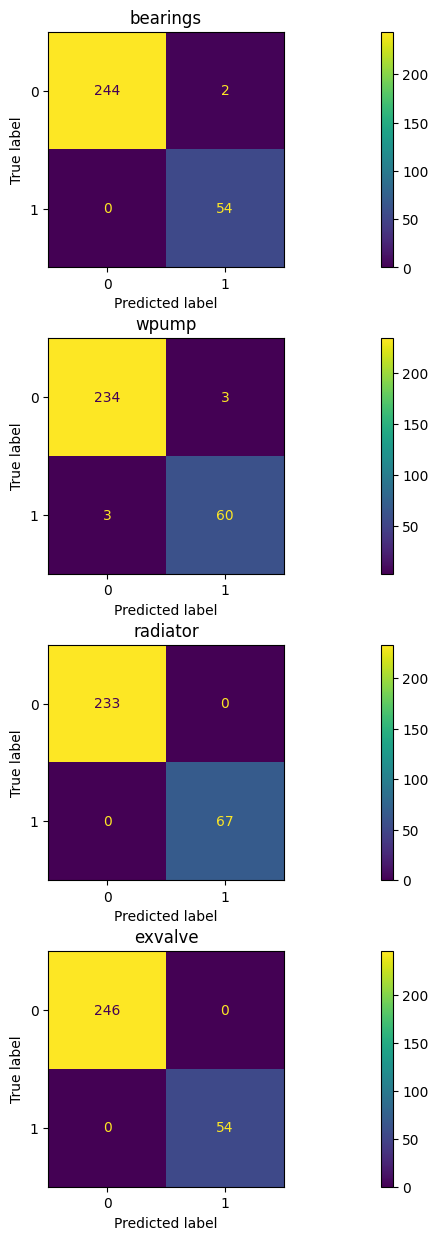

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_pred = np.round(model.predict(X_test))
f, axes = plt.subplots(4, 1, figsize=(25, 15))
axes = axes.ravel()
labels=['bearings', 'wpump', 'radiator', 'exvalve']
for i in range(4):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:, i],
                                                   y_pred[:, i]),
                                  display_labels=[0, 1])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(labels[i])
    
    # disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.3)
# f.colorbar(disp.im_, ax=axes)
plt.show()